In [1]:
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
import os

print("All imports succssful")

c:\Users\DELL\Desktop\Exercises\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All imports succssful


In [6]:
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

if not openai_api_key:
    raise ValueError('OPENAI_API_KEY not found! Please set it in your .env file.')

print("API key loaded successfully")

API key loaded successfully


In [7]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.7,
    api_key=openai_api_key
)

print(f"LLM initialized: {llm.model_name}")

LLM initialized: gpt-4o-mini


In [8]:
sys_msg = SystemMessage(
    content="You are a helpful customer support representative for an electronics store. Be friendly, professional, and try to solve the customer's issues. Ask clarifying questions when needed."
)

def customer_support_agent(state: MessagesState) -> dict:
    messages = [sys_msg] + state["messages"]
    response = llm.invoke(messages)
    return {"messages": [AIMessage(content=response.content)]}

print("Assistant mode defined")

Assistant mode defined


In [9]:
builder = StateGraph(MessagesState)
builder.add_node("customer_support", customer_support_agent)
builder.add_edge(START, "customer_support")
builder.add_edge("customer_support", END)

print("Graph structure defined")

Graph structure defined


In [10]:
memory = MemorySaver()
support_agent = builder.compile(checkpointer=memory)

print("Agent compiled with memory")

Agent compiled with memory


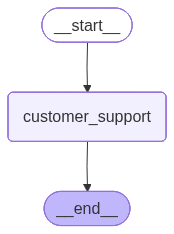

In [11]:
try:
    display(Image(support_agent.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph: {e}")
    print("Graph structure: START → assistant → END")

In [14]:
def run_customer_conversation(user_input: str, thread_id: str):
    result = support_agent.invoke(
        {"messages": [HumanMessage(content=user_input)]},
        config={"configurable": {"thread_id": thread_id}}
    )
    
    for message in result["messages"]:
        if isinstance(message, HumanMessage):
            print(f"\nCustomer: {message.content}")
        elif isinstance(message, AIMessage):
            print(f"Support: {message.content}")
    
    print("\n" + "="*70)

print("Conversation function ready")

Conversation function ready


In [19]:
def real_time_conversation():
    """Run a real-time conversation with the customer support agent."""
    print("\n" + "="*70)
    print(" ELECTRONICS STORE CUSTOMER SUPPORT")
    print("="*70)
    print("Type 'exit' to end the conversation")
    print("Type 'new' to start a new conversation with a different thread")
    print("="*70)
    
    thread_id = "user_001"  
    conversation_counter = 1
    
    while True:
       
        user_input = input(f"\n[{thread_id}] You: ").strip()
        
        
        if user_input.lower() == 'exit':
            print("\nThank you for contacting customer support. Have a great day!")
            break
        
        
        if user_input.lower() == 'new':
            conversation_counter += 1
            thread_id = f"user_{conversation_counter:03d}"
            print(f"\n Starting new conversation with thread ID: {thread_id}")
            print("Type 'exit' to end, 'new' to start another conversation")
            continue
        
        
        if not user_input:
            print("Please enter a message.")
            continue
        
        
        try:
            print("\n" + "="*70)
            print(f"Processing your query... (Thread: {thread_id})")
            print("="*70)
            
            
            result = support_agent.invoke(
                {"messages": [HumanMessage(content=user_input)]},
                config={"configurable": {"thread_id": thread_id}}
            )
            
            
            for message in result["messages"]:
                if isinstance(message, AIMessage):
                    print(f"\n Support: {message.content}")
            
            print("\n" + "="*70)
            
        except Exception as e:
            print(f"\n Error: {e}")
            print("Please try again or type 'exit' to quit.")
real_time_conversation()

print("All Ready")



 ELECTRONICS STORE CUSTOMER SUPPORT
Type 'exit' to end the conversation
Type 'new' to start a new conversation with a different thread



 Starting new conversation with thread ID: user_002
Type 'exit' to end, 'new' to start another conversation

Processing your query... (Thread: user_002)

 Support: Hello! How can I assist you today?

 Support: Could you please provide me with a bit more detail? Are you looking to purchase a new product, or are you seeking to replace an existing one? If it's a specific product you're interested in, please let me know what it is!

 Support: That sounds exciting! For AI development, you'll want a laptop with a strong processor, ample RAM, and a good GPU. Here are a few questions to help narrow down your options:

1. **What is your budget?**
2. **Do you have a preference for a specific operating system (Windows, macOS, Linux)?**
3. **What kind of AI development are you planning to do? (e.g., machine learning, deep learning, data analysis)**
4. **Do you need any specific software or hardware requirements?**

Let me know, and I can help recommend some suitable laptops!

 Support: For AI dev